In [1]:
from main import run_code
from main import whole_plot, signal_plot
from functions import fft_plot
from lfp_process import reshape

In [2]:
output_dict = run_code()

**********Running Rossler Network****************
***********************Network running completed***************************
***********************Loading LFP and Rossler Data************************

****************************Loading Completed, Initiating FF_Model***************************************
**********************Loading the model, Initiating Training phase**************************
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (None, 500, 200)          82800     
                                                                 
 dense_4 (Dense)             (None, 500, 1)            201       
                                                                 
Total params: 83001 (324.22 KB)
Trainable params: 83001 (324.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1

In [3]:
model = output_dict['Model']
train_lfp = output_dict['train_lfp']
train_data = output_dict['train_data']
test_lfp = output_dict['test_lfp']
test_data = output_dict['test_data']
whole_lfp = output_dict['whole_lfp']
whole_data = output_dict['whole_data']

In [4]:
new_train_data = reshape(train_data, mode='train_data')
train_output = model.predict(new_train_data)

new_train_output = reshape(train_output, mode='test')

1/1 [==============================] - 0s 278ms/step


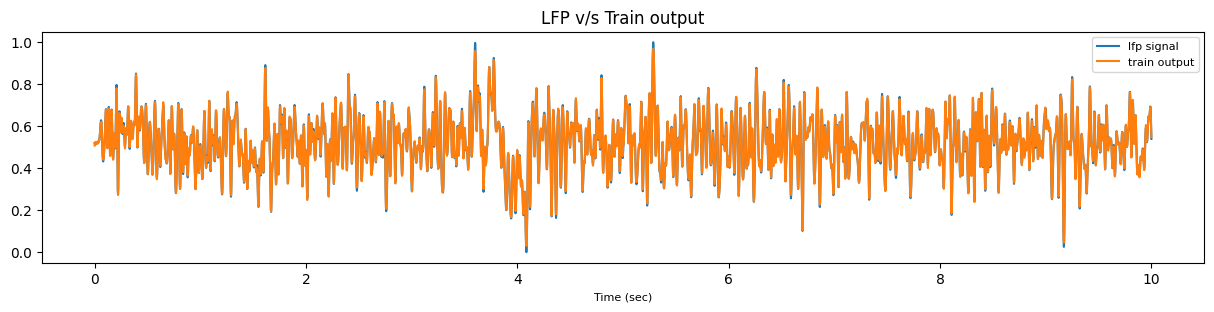

In [5]:
# Training
labels = ('lfp signal', 'train output', 'LFP v/s Train output')
signal_plot(train_lfp, new_train_output, *labels)

1/1 [==============================] - 0s 79ms/step


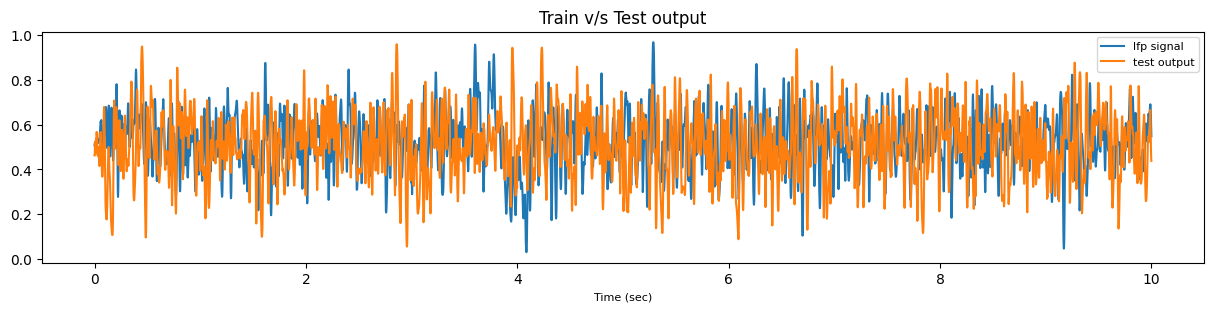

In [12]:
new_test_data = reshape(test_data, mode='train_data')
test_output = model.predict(new_test_data)
new_test_output = reshape(test_output, mode='test')

labels = ('lfp signal', 'test output', 'Train v/s Test output')
signal_plot(new_train_output , new_test_output, *labels)

c:\Users\Sandeep\anaconda3\envs\env_cp\lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


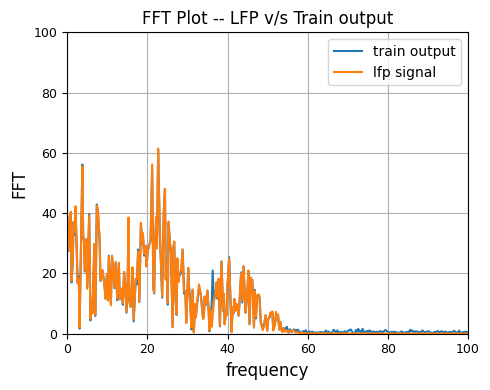

In [7]:
# Train fft
label = ('lfp signal', 'train output', 'FFT Plot -- LFP v/s Train output')
fft_plot(train_lfp, new_train_output, *label)

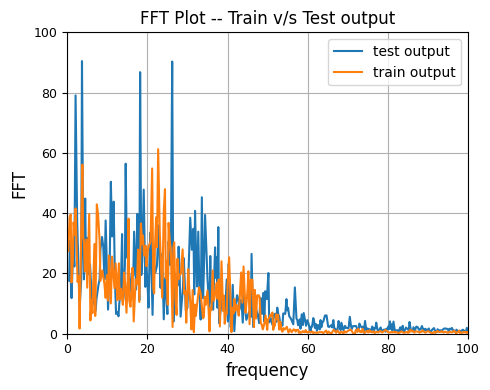

In [8]:
# fft testing
label = ('train output', 'test output', 'FFT Plot -- Train v/s Test output')
fft_plot(new_train_output, new_test_output, *label)

In [9]:
new_whole_data = reshape(whole_data, mode='train_data')

whole_output = model.predict(new_whole_data)
new_whole_output = reshape(whole_output, mode='test')

1/1 [==============================] - 0s 159ms/step


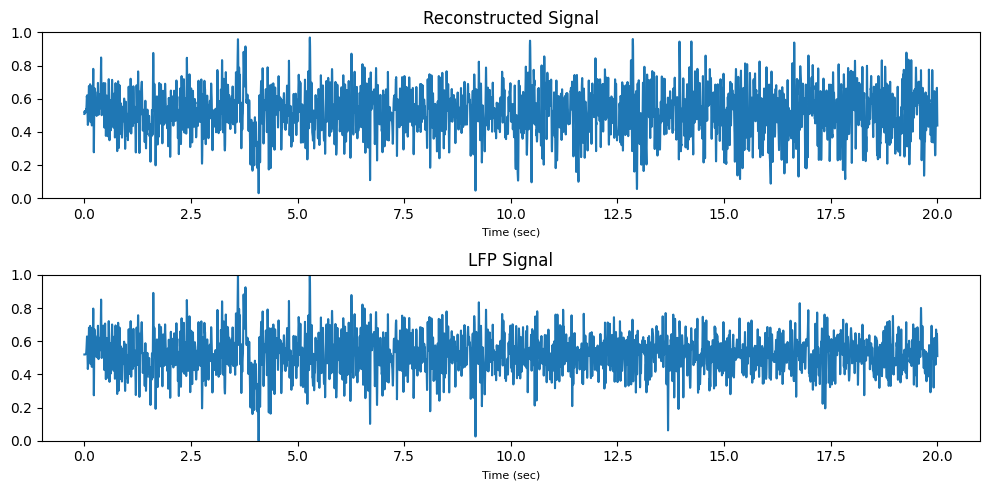

In [10]:
whole_plot(whole_lfp, new_whole_output)